<a href="https://colab.research.google.com/github/cristiansetup/CancerIA/blob/main/IA_cancer_de_mama_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [2]:
#librerias
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import decomposition
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve,roc_auc_score
from yellowbrick.model_selection import learning_curve
import seaborn as sns; sns.set_theme(color_codes=True)
from IPython.display import clear_output 

#carga del dataset
datos=pd.read_csv("data.csv", sep=',')
datos['diagnosis'] = datos['diagnosis'].str.strip().replace(['M', 'B'], [1, 0])
labels=datos['diagnosis']
caracteristicas=datos.drop(['diagnosis','id','Unnamed: 32'],axis=1)


# Escalización

In [3]:
#Escalización 
X_train, X_test, y_train, y_test = train_test_split(caracteristicas,labels,test_size=0.2,train_size=0.8,random_state=1004996740)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA

In [4]:
#PCA del dataset
#pca1 = decomposition.PCA(n_components=30,whiten=True)
#pca.fit(X_train)
#X_train = pca.transform(X_train)
#print(np.cumsum(pca.explained_variance_ratio_*100))
#plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
#plt.xlabel('número de caracteristicas')
#plt.ylabel('varianza(%)')

In [5]:
#Descomposicíon de variables a PCA
pca = decomposition.PCA(n_components=15,whiten=True)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_train=pd.DataFrame(X_train, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15'])
X_test=pd.DataFrame(X_test, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15'])

# Diagnósticos

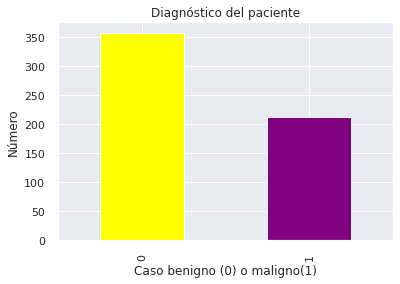

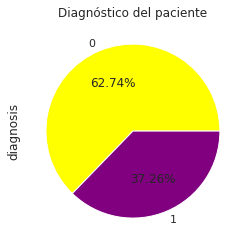

In [6]:
#diagnosticos
colorsalida = ['yellow','purple']
plot =labels.value_counts().plot(kind='bar',title='Diagnóstico del paciente',color=colorsalida)
plt.xlabel('Caso benigno (0) o maligno(1)')
plt.ylabel('Número')
plt.show()
plot2 =labels.value_counts().plot(kind='pie', autopct='%1.2f%%',title='Diagnóstico del paciente',colors=colorsalida)
plt.show()

# Correlación de parámetros

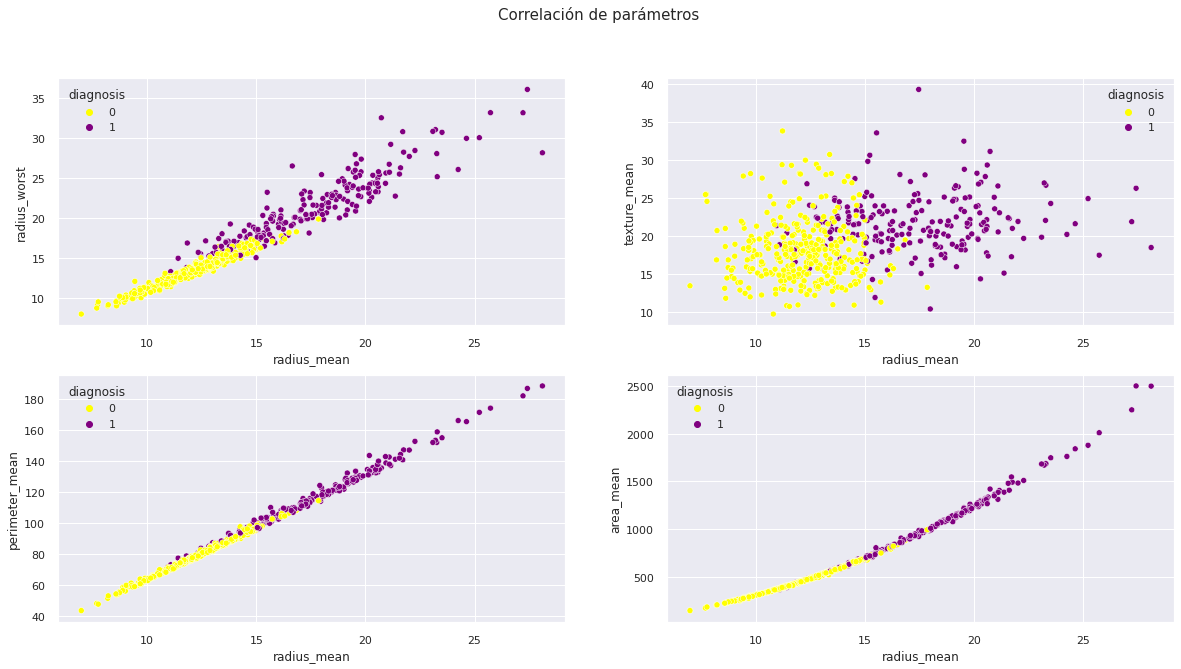

In [7]:

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Correlación de parámetros', size=15)



sns.scatterplot(ax = axes[0, 0], data = datos, x = 'radius_mean', y='radius_worst', hue = 'diagnosis', palette=['yellow','purple'])
sns.scatterplot(ax = axes[0, 1], data = datos, x = 'radius_mean', y='texture_mean', hue = 'diagnosis', palette=['yellow','purple'])
sns.scatterplot(ax = axes[1, 0], data = datos, x = 'radius_mean', y='perimeter_mean', hue = 'diagnosis', palette=['yellow','purple'])
sns.scatterplot(ax = axes[1, 1], data = datos, x = 'radius_mean', y='area_mean', hue = 'diagnosis', palette=['yellow','purple'])


Gracias a las gráficas realizadas anteriormente podemos encontrar que los datos son linealmente separables. Pues si evidenciamos las gráficas, las etiquetas de cada grupo de datos graficado se pueden separar mediante el uso de una única línea.

Metrica para la evaluación: La metrica a utilizar es la sensitividad, dado a que lo que se busca con el clasificador es lograr una gran cantidad de verdaderos positivos y una baja cantidad de falsos negativos. Pues no estaria bien que alguna persona que tuviese cancer de mama, no fuese diagnosticada con el mismo.

# Regresión logística.

In [8]:
CR=[0.01,0.1,1.0,10.0,100.0] #Hiperparametro
CR1=[]
score1=[]
sensitividadrl1=[]
f1scorerl1=[]
mccrl1=[]
ROC1=[]
cross01=[]
cross02=[]
cross03=[]
cross04=[]
for CR in CR: #Ciclo for para evaluar todas las posibles iteraciones
  reglogcancer= LogisticRegression(C=CR,random_state=1004996740).fit(X_train, y_train) #regresión logstica
  CV=cross_validate(reglogcancer, X_test, y_test, cv=3,scoring=('recall','f1','accuracy','roc_auc')) #Cross validation
  cross1=np.mean(CV['test_recall'])#cross validation
  cross2=np.mean(CV['test_f1'])
  cross3=np.mean(CV['test_accuracy'])
  cross4=np.mean(CV['test_roc_auc'])
  score=reglogcancer.score(X_test, y_test) #Score
  ypredicchoreglog=reglogcancer.predict(X_test) #Regresión con la predicción
  matrizreglog=confusion_matrix(y_test, ypredicchoreglog) #matríz de confusión
  sensitividadrl=recall_score(y_test, ypredicchoreglog,average='binary') #Sensitivida
  f1scorerl=f1_score(y_test, ypredicchoreglog) #metrica de evaluación F1
  mccrl=matthews_corrcoef(y_test, ypredicchoreglog) #metrica de evaluación MCCR
  CR1.append(CR)
  cross01.append(cross1)
  cross02.append(cross2)
  cross03.append(cross3)
  cross04.append(cross4)
  score1.append(score)
  sensitividadrl1.append(sensitividadrl)
  f1scorerl1.append(f1scorerl)
  mccrl1.append(mccrl)
  fpr, tpr, thresholds = metrics.roc_curve(y_test,ypredicchoreglog, pos_label=1) #ROC
  roc_auc=metrics.roc_auc_score(y_test,ypredicchoreglog) #metrica de evaluación AUC_ROC
  ROC1.append(roc_auc)
  

In [9]:
#Exportacióon a CSV
regresion=pd.DataFrame({'coeficiente de regularización':CR1,
                        'cross_validation recall':cross01,
                        'cross_validation f1score':cross02,
                        'cross_validation score':cross03,
                        'cross_validation roc_auc':cross04,
                        'score':score1,
                        'recall':sensitividadrl1,
                        'f1score':f1scorerl1,
                        'mcc':mccrl1,
                        'roc auc':ROC1})
regresion.to_csv('hiperparametrosregresion.csv',index=False)

# SVM kernel

In [10]:
kernelSVM=['linear','rbf','sigmoid'] #hiperparámetro
csvm=[0.01,0.1,1.0,10.0,100.0] #hiperparámetro
kernelsvm1=[]
csvm1=[]
scoresvmcancer1=[]
sensitividadsvm1=[]
f1scoresvm1=[]
mccsvm11=[]
rocsvm=[]
cross01=[]
cross02=[]
cross03=[]
cross04=[]
for kernelSVM in kernelSVM: #Ciclo for para evaluar todas las posibles iteraciones del hiperparámetro
  for CSVM in csvm:         #Ciclo for para evaluar todas las posibles iteraciones del hiperparámetro
    svmcancer=svm.SVC(kernel=kernelSVM,C=CSVM,coef0=1.0,random_state=1004996740).fit(X_train,y_train) #SVM
    CV=cross_validate(svmcancer, X_test, y_test, cv=3,scoring=('recall','f1','accuracy','roc_auc')) #Cross validation
    cross1=np.mean(CV['test_recall'])#cross validation
    cross2=np.mean(CV['test_f1'])
    cross3=np.mean(CV['test_accuracy'])
    cross4=np.mean(CV['test_roc_auc'])
    cross01.append(cross1)
    cross02.append(cross2)
    cross03.append(cross3)
    cross04.append(cross4)
    scoresvmcancer=svmcancer.score(X_test, y_test) #Score
    y_predictsvmcancer=svmcancer.predict(X_test) #predicción del SVM
    matrizsvm=confusion_matrix(y_test, y_predictsvmcancer) #matriz de confusión 
    sensitividadsvm=recall_score(y_test, y_predictsvmcancer,average='binary') #sensitividad
    f1scoresvm=f1_score(y_test, y_predictsvmcancer) #Metrica de evaluación F1
    mccsvm=matthews_corrcoef(y_test, y_predictsvmcancer) #Metrica de evaluación MCC
    csvm1.append(CSVM)
    kernelsvm1.append(kernelSVM)
    scoresvmcancer1.append(scoresvmcancer)
    sensitividadsvm1.append(sensitividadsvm)
    f1scoresvm1.append(f1scoresvm)
    mccsvm11.append(mccsvm)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predictsvmcancer, pos_label=1) #ROC
    roc_auc=metrics.roc_auc_score(y_test,y_predictsvmcancer) #Metrica de evaluación ROC
    rocsvm.append(roc_auc)
clear_output()

In [11]:
#Exportación a CSV
regresion=pd.DataFrame({'KernelSVM':kernelsvm1,
                        'csvm':csvm1,
                        'cross_validation recall':cross01,
                        'cross_validation f1score':cross02,
                        'cross_validation score':cross03,
                        'cross_validation roc_auc':cross04,
                        'score':scoresvmcancer1,
                        'recall':sensitividadsvm1,
                        'f1score':f1scoresvm1,
                        'mcc':mccsvm11,
                        'roc auc':rocsvm})
regresion.to_csv('hiperparametrosSVMkernel.csv',index=False)

# Svm con grado polinomial

In [12]:
csvm=[0.01,0.1,1.0,10.0,100.0] #hiperparametro
grado1=[2,3,4]#hiperparametro
csvm1=[]
grado2=[]
scoresvmcancer1=[]
sensitividadsvmgrado1=[]
f1scoresvmgrado1=[]
mccsvmgrado1=[]
rocgrade=[]
cross01=[]
cross02=[]
cross03=[]
cross04=[]
for csvm in csvm: #Ciclo for para evaluar todas las posibles iteraciones del hiperparámetro
  for grado in grado1: #Ciclo for para evaluar todas las posibles iteraciones del hiperparámetro
    svmcancer=svm.SVC(kernel='poly',C=csvm,degree=grado,coef0=1.0,random_state=1004996740).fit(X_train,y_train) #Implementación SVM
    CV=cross_validate(svmcancer, X_test, y_test, cv=3,scoring=('recall','f1','accuracy','roc_auc')) #Cross validation
    cross1=np.mean(CV['test_recall'])#cross validation
    cross2=np.mean(CV['test_f1'])
    cross3=np.mean(CV['test_accuracy'])
    cross4=np.mean(CV['test_roc_auc'])
    cross01.append(cross1)
    cross02.append(cross2)
    cross03.append(cross3)
    cross04.append(cross4)
    scoresvmcancer=svmcancer.score(X_test, y_test) #score
    y_predictsvmcancer=svmcancer.predict(X_test) #Predicción del SVM
    matrizsvm=confusion_matrix(y_test, y_predictsvmcancer) #matríz de confusión
    sensitividadsvm=recall_score(y_test, y_predictsvmcancer,average='binary') #Sensitividad
    f1scoresvmgrado=f1_score(y_test, y_predictsvmcancer) #Metrica de evaluación F1
    mccsvmgrado=matthews_corrcoef(y_test, y_predictsvmcancer)#Metrica de evaluación MCC
    grado2.append(grado)
    csvm1.append(csvm)
    scoresvmcancer1.append(scoresvmcancer)
    sensitividadsvmgrado1.append(sensitividadsvm)
    f1scoresvmgrado1.append(f1scoresvmgrado)
    mccsvmgrado1.append(mccsvmgrado)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predictsvmcancer, pos_label=1) #ROC
    roc_auc=metrics.roc_auc_score(y_test,y_predictsvmcancer)#Metrica de evaluación ROC_AUC
    rocgrade.append(roc_auc)
    

In [13]:
#Exportación a SVM
svmgrado=pd.DataFrame({'Csvm':csvm1,
                        'grado':grado2,
                        'cross_validation recall':cross01,
                        'cross_validation f1score':cross02,
                        'cross_validation score':cross03,
                        'cross_validation roc_auc':cross04,
                        'score':scoresvmcancer1,
                        'recall':sensitividadsvmgrado1,
                        'f1score':f1scoresvmgrado1,
                        'mcc':mccsvmgrado1,
                        'roc auc':rocgrade})
svmgrado.to_csv('hiperparametrossvmgrado.csv',index=False)

# *Red* neuronal

In [14]:
activation=['identity', 'logistic', 'tanh','relu'] #Hiperparametro de activación
solver=['adam'] #solver
capas=[(50,50),(25,25),(10,10),(5,5),(2,2),(50,50,50),(25,25,25),(10,10,10),(5,5,5),(2,2,2)] #Número de capas de la red
learning_rate=['adaptive'] #Learnig rate
tasa=[0.3,0.01,0.1] #Hiperparametro de tasa
regularity=[0.0001,0.001,0.01,0.1,1.0] #Regularización
activation2=[]
capas2=[]
tasa1=[]
regularity2=[]
scorered1=[]
sensitividadred1=[]
f1scorered1=[]
mccred1=[]
rocred=[]
cross01=[]
cross02=[]
cross03=[]
cross04=[]
for activation1 in activation: #Ciclo for para evaluar todas las posibles iteraciones del hiperparámetro de activación
   for capas1 in capas: #Ciclo for para evaluar todas las posibles iteraciones del hiperparámetro de capas
      for learning_rate_init in tasa: #Ciclo for para evaluar todas las posibles iteraciones del hiperparámetro de learning rate
          for regularity1 in regularity: #Ciclo for para evaluar todas las posibles iteraciones del hiperparámetro de regularización
              red= MLPClassifier(learning_rate_init=learning_rate_init,activation=activation1,hidden_layer_sizes=capas1,random_state=1,alpha=regularity1, max_iter=1000).fit(X_train, y_train)#Implememntación de la red neuronal
              CV=cross_validate(red, X_test, y_test,scoring=('recall','f1','accuracy','roc_auc')) #Cross validation
              cross1=np.mean(CV['test_recall'])#cross validation
              cross2=np.mean(CV['test_f1'])
              cross3=np.mean(CV['test_accuracy'])
              cross4=np.mean(CV['test_roc_auc'])              
              cross01.append(cross1)
              cross02.append(cross2)
              cross03.append(cross3)
              cross04.append(cross4)
              scorered=red.score(X_test, y_test) #score
              y_predictred=red.predict(X_test) #predicción de la red
              matrizred=confusion_matrix(y_test, y_predictred) #matriz de confusión
              sensitividadred=recall_score(y_test, y_predictred,average='binary') #sensitividad
              f1scorered=f1_score(y_test, y_predictred) #Metrica de evaluación F1
              mccred=matthews_corrcoef(y_test, y_predictred)#Metrica de evaluación MCC
              activation2.append(activation1)
              capas2.append(capas1)
              tasa1.append(learning_rate_init)
              regularity2.append(regularity1)
              scorered1.append(scorered)
              sensitividadred1.append(sensitividadred)
              f1scorered1.append(f1scorered)
              mccred1.append(mccred)
              fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predictred, pos_label=1) #ROC
              roc_auc=metrics.roc_auc_score(y_test,y_predictred)#Metrica de evaluación ROC
              rocred.append(roc_auc)  
              clear_output()

In [15]:
#Exportación a CSV
redneuronal=pd.DataFrame({'activation':activation2,
                        'regularización':regularity2,
                        'capas':capas2,
                        'tasa':tasa1,
                        'cross_validation recall':cross01,
                        'cross_validation f1score':cross02,
                        'cross_validation score':cross03,
                        'cross_validation roc_auc':cross04,
                        'score':scorered1,
                        'recall':sensitividadred1,
                        'f1score':f1scorered1,
                        'mcc':mccred1,
                        'roc auc':rocred})
redneuronal.to_csv('hiperparametrosredneuronal.csv',index=False)

# Metodos óptimos


***Regresión logística***
Realizando un barrido parámetrico se encontró que la versión de regresión logística que mejor desempeño presentó fue: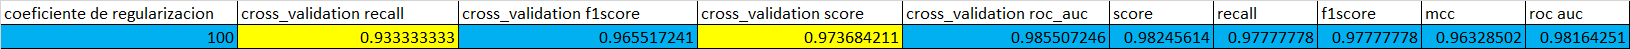

***SVM con kernel*** Realizando un barrido parámetrico se encontró que la versión del SVM con kernel que mejor desempeño presentó fue: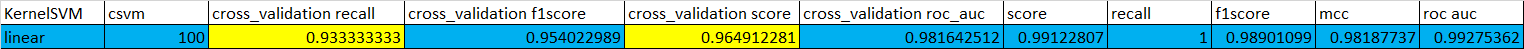

***SVM con grado*** Realizando un barrido parámetrico se encontró que la versión del SVM con grado que mejor desempeño presentó fue: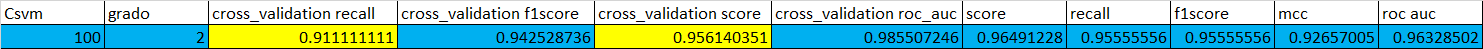


***Red neuronal*** Realizando un barrido parámetrico se encontró que la versión de la red neuronal que mejor desempeño presentó fue: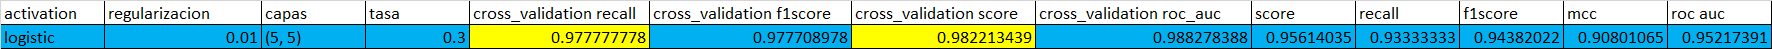